# Summary of the data set:

In this section we are going to display a quick summary of the data including sample of row data, some graphs and tables and statistics summaries.
First we have to import the data, so we can work with it and display its content correctly.

In [ ]:
import pandas as pd
dataCancer = pd.read_csv('cancer_preprossing.csv')

### Sample of data:

First we going to display the first 5 row as a sample of the preprocessed data using the following code:

In [2]:
from IPython.display import display, HTML  # Import the HTML class so we can display the table

#print sample of 1st 5  
print('The first 5 rows of the raw data:')
data_sample = dataCancer.head(5)
# Generate HTML code from the sample
sample_table = data_sample.to_html(index=False)
# Display the HTML table in the notebook
display(HTML(sample_table))

The first 5 rows of the raw data:


id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,discretized_radius_mean,discretized_texture_mean,discretized_perimeter_mean,discretized_area_mean,discretized_smoothness_mean,discretized_compactness_mean,discretized_concavity_mean,discretized_concave points_mean,discretized_symmetry_mean,discretized_fractal_dimension_mean,discretized_radius_se,discretized_texture_se,discretized_perimeter_se,discretized_area_se,discretized_smoothness_se,discretized_compactness_se,discretized_concavity_se,discretized_concave points_se,discretized_symmetry_se,discretized_fractal_dimension_se,discretized_radius_worst,discretized_texture_worst,discretized_perimeter_worst,discretized_area_worst,discretized_smoothness_worst,discretized_compactness_worst,discretized_concavity_worst,discretized_concave points_worst,discretized_symmetry_worst,discretized_fractal_dimension_worst
842517.0,1,2.385527,-0.243112,2.249570,2.702274,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,-0.278561,2.143154,2.802113,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2,1,2,2,1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,2,1,2,2,1,0,0,2,1,1
84300903.0,1,2.077552,0.645516,2.100705,2.238589,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,0.097792,1.903235,2.205605,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2,1,2,2,2,2,2,2,2,1,1,0,1,1,0,1,1,2,1,1,2,1,2,2,1,2,1,2,2,1
84358402.0,1,2.287535,-1.118971,2.362502,2.592950,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,-1.475078,1.891810,1.881994,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2,0,2,2,1,1,2,2,1,0,1,0,1,2,2,1,1,2,0,1,2,0,2,2,1,0,1,1,0,0
843786.0,1,-0.456240,-0.771692,-0.334009,-0.497909,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,-0.218202,0.033388,-0.130676,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1,0,1,0,2,2,1,1,2,2,0,0,0,0,1,1,1,1,1,1,1,1,1,0,2,2,2,2,2,2
844359.0,1,1.573593,0.321218,1.566844,1.624111,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,0.475920,1.929893,1.956859,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,2,1,2,2,1,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,2,1,2,2,1,1,1,2,1,1


## Data Visualization

Displaying the data in a graphic format can help to analyze the data and reporting it. We used several charts as following:

We use the pie chart to show the percentage of different diagnosis in our data which turn out to be 62.7% benign and 37.3% malignant.

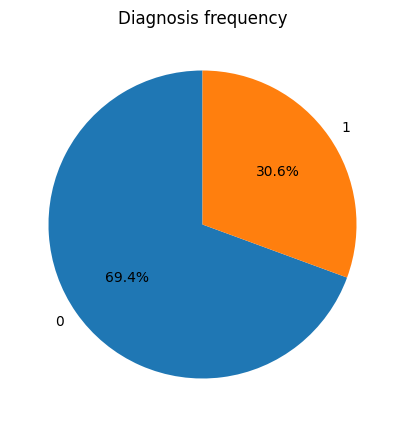

In [3]:
# graphs and tables show variable distribution , missing values
import matplotlib.pyplot as plt

#calculate the frequancy for each diagnosis
diagnosis_frequency = dataCancer['diagnosis'].value_counts(normalize=True)*100

#plot a ppie chart
diagnosis_frequency.plot.pie(autopct='%1.1f%%',figsize=(5,5),startangle=90)

#display the plot with appropriate apperance by changing the values of the attribute
plt.title('Diagnosis frequency')
plt.ylabel('')
plt.show()

Also, we use the plot box to show variable distribution for each attribute and comparing the values across different diagnosis.

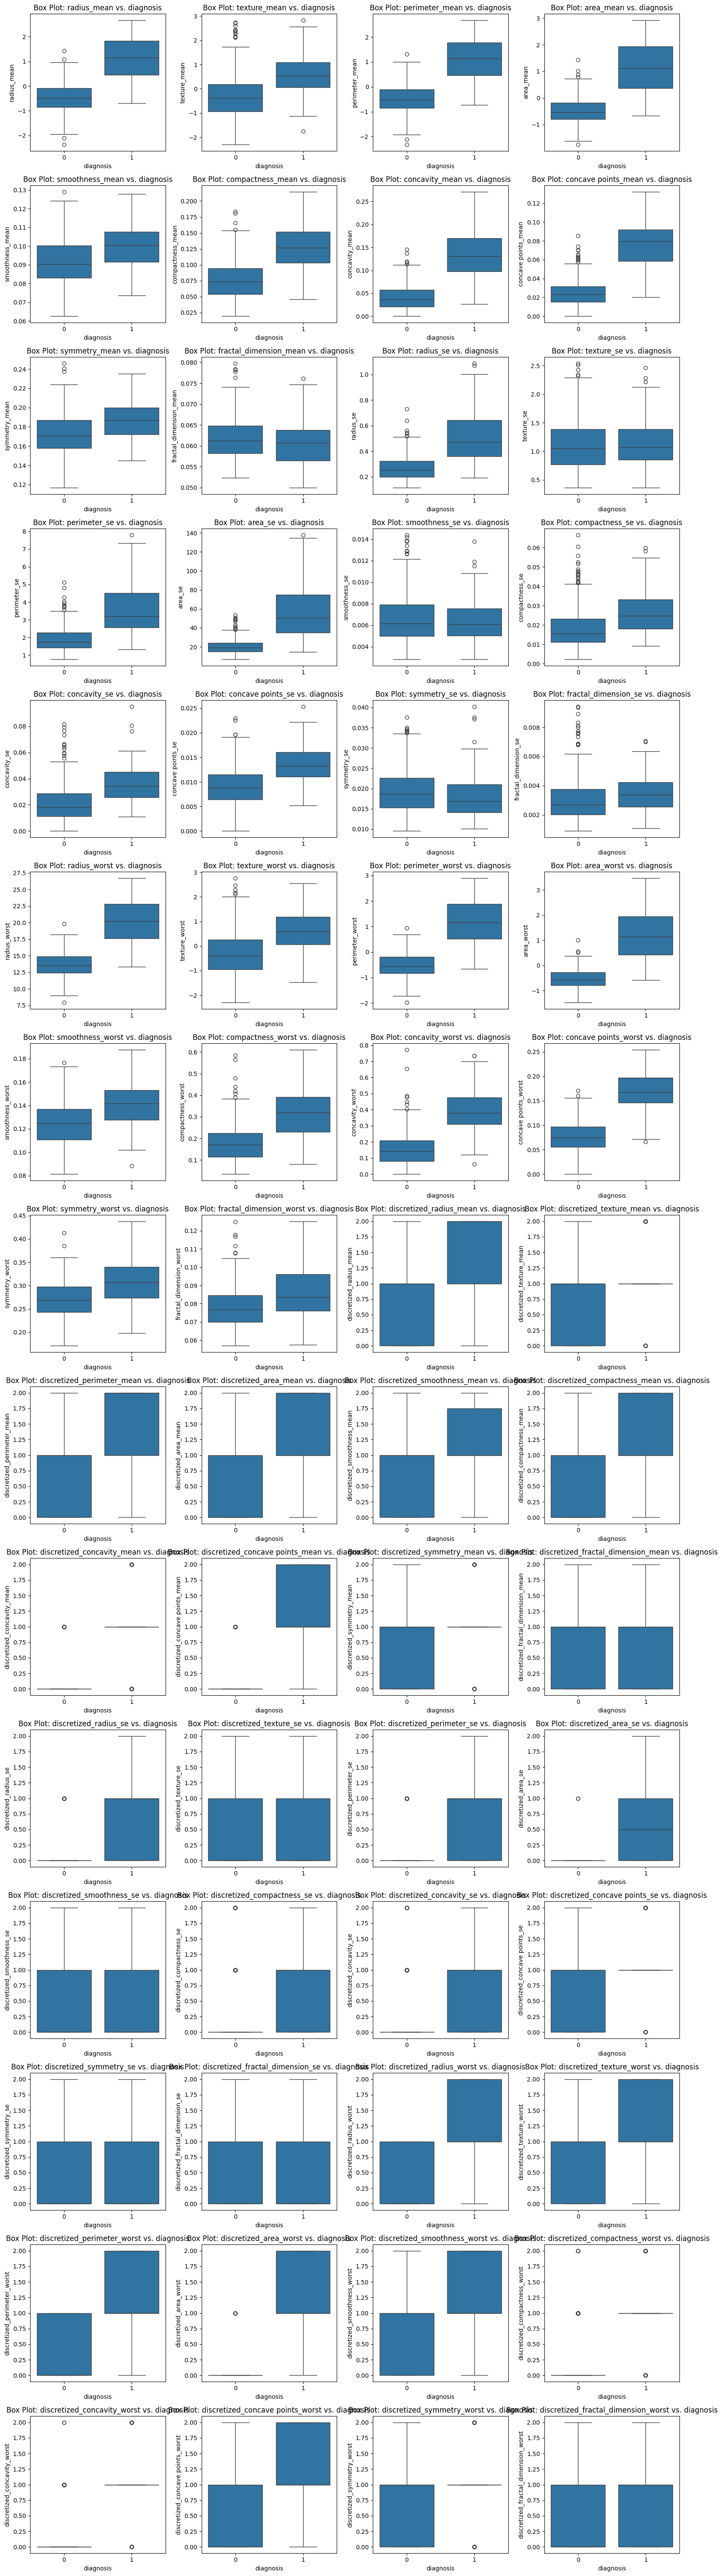

In [4]:
#this is to solve the problem of "ModuleNotFoundError: No module named ‘seabor’"
%pip install seaborn 
import seaborn as sns


target_column = 'diagnosis'

# choosing the numiric data only
feature_columns = dataCancer.columns[(dataCancer.columns != target_column) & (dataCancer.columns != 'id')]


# Determine the number of rows and columns for the subplot layout
num_features = len(feature_columns)
num_rows = (num_features - 1) // 4 + 1
num_cols = min(4, num_features)

# Create box plots for each feature grouped by 'diagnosis'
plt.figure(figsize=(16, 4 * num_rows))

for i, feature in enumerate(feature_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=target_column, y=feature, data=dataCancer)
    plt.title(f'Box Plot: {feature} vs. {target_column}')
    plt.xlabel(target_column)
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Majority of our data is a numeric data and one of the best ways to visualize it is using the matrix of scatter plots(pair plot) in order to have a clear vision of the relationship between the data.

In [6]:
#exclude the id attribute
selected_feature = dataCancer.iloc[:, 1:]

# Create a matrix of scatter plots
sns.pairplot(selected_feature, hue='diagnosis', palette = 'Set2')


plt.suptitle('Pair Plot of Breast Cancer Dataset', y=1.02)
plt.show()
plt.savefig('scatter_plot.png', dpi=300)
#note: the code might not be excuted in github duo to the lanrge size of the resulted graph that prevent the file to be loaded
#the grapgh was uploded as a separate png file to easy access

## Summary Statistics

It's important to take a look at the statistic summary to capture the different characteristics of our data set, such as the central tendency measurement and the variance. The table below shows these measurements that have been calculated by the python code above it.

In [5]:
import statistics as st

summary_data = []

for columnName in feature_columns:
    columnData = dataCancer[columnName]
    midrange = (max(columnData) + min(columnData)) / 2
    summary_data.append({
        'Feature': columnName,
        'Mean': st.mean(columnData),
        'Median': st.median(columnData),
        'Mode': st.mode(columnData),
        'Midrange': midrange,
        'Variance': st.variance(columnData)
    })

# Create the DataFrame after the loop
statistical_summaries = pd.DataFrame(summary_data)

# Generate HTML code from the DataFrame
statistical_summaries_table = statistical_summaries.to_html(index=False)
# Display the HTML table in the notebook
display(HTML(statistical_summaries_table))

Feature,Mean,Median,Mode,Midrange,Variance
radius_mean,-1.961646e-16,-0.204261,-0.494737,0.147635,1.002222
texture_mean,-1.055898e-15,-0.082239,-0.771692,0.265040,1.002222
perimeter_mean,-5.384951e-17,-0.195924,-0.331956,0.178035,1.002222
area_mean,-2.328994e-16,-0.270967,-0.365589,0.586474,1.002222
smoothness_mean,9.450643e-02,0.094250,0.100700,0.095805,0.000157
compactness_mean,9.187455e-02,0.084240,0.114700,0.116990,0.001470
concavity_mean,6.959783e-02,0.051330,0.000000,0.135600,0.003218
concave points_mean,4.123558e-02,0.029950,0.000000,0.066100,0.000930
symmetry_mean,1.763067e-01,0.176100,0.189300,0.181300,0.000487
fractal_dimension_mean,6.151707e-02,0.061040,0.056670,0.064860,0.000027
